In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

In [2]:
# Wavefunction generation
import scf_runs, importlib
modules = [scf_runs]
for m in modules:
    importlib.reload(m)

# Jastrow optimization
import glob
# for fname in glob.glob("*hdf5"):
#     if os.path.isfile(fname):
#         os.remove(fname)
from scf_runs import run_lda_li, run_casci, run_lda_he
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=12, ncas =4)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.88192509025559  E(CI) = -2.88192509025559  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.951769234759041  E(CI) = -0.951769234759041  S^2 = 0.0000000
CASCI state   3  E = -0.384692858905305  E(CI) = -0.384692858905305  S^2 = 2.0000000
CASCI state   4  E = -0.384692858905302  E(CI) = -0.384692858905302  S^2 = 2.0000000
CASCI state   5  E = -0.01403

In [3]:
mc.ci

[FCIvector([[ 9.96654682e-01, -1.36564740e-02,  5.34929885e-18,
             -2.61489388e-17],
            [-1.36564740e-02, -6.47461792e-02, -1.96316622e-19,
              2.31058052e-18],
            [ 2.54806336e-18, -2.15199681e-19, -3.25144507e-02,
             -1.31463635e-18],
            [-2.73085347e-17,  2.33725766e-18, -3.42018195e-19,
             -3.25144507e-02]]),
 FCIvector([[ 0.00000000e+00,  7.07106781e-01,  1.92229718e-16,
             -9.85925468e-16],
            [-7.07106781e-01, -1.44219745e-16,  4.89931479e-18,
             -1.82806005e-16],
            [ 1.08484169e-16,  1.99470403e-17, -7.44203011e-17,
             -2.30055473e-16],
            [-7.96603763e-16, -1.75944307e-16,  1.69364476e-16,
             -8.78895649e-17]]),
 FCIvector([[-1.50879918e-02, -7.04916982e-01,  1.54729441e-16,
              2.06940003e-16],
            [-7.04916982e-01,  7.57193892e-02, -6.71841374e-18,
              7.86195859e-20],
            [-3.16390130e-17,  7.69219804e-19,

In [4]:
opt_settings = {'nconfig': 1000,
               'max_iterations':2}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':100,
                'nsteps_per_block':10}

vmc_cusp=True
abvmc_cusp=False

In [5]:
# import wftools, bosonrecipes, importlib, recipes, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools 
# modules = [bosonrecipes,wftools, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
# for m in modules:
#     importlib.reload(m)
import os, bosonrecipes    
# Jastrow optimization
bosonsj = "boson-test-ovlp-he.hdf5"    
for fname in [bosonsj]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")
bosonrecipes.ABOPTIMIZE(scf_checkfile, bosonsj, 
                        ci_checkfile=ci_checkfile, 
                        verbose=True,
                        jastrow_kws={"ion_cusp":abvmc_cusp},
                       **opt_settings)
# Jastrow optimization results
# bosonrecipes.read_abopt(bosonsj)

RUNNING VMC OPTIMIZATION
> /Users/ksu/Documents/GitHub/pyqmc/pyqmc/bosonrecipes.py(342)initialize_boson_qmc_objects()
    340     pdb.set_trace()
    341     # Use when testing HF
--> 342     if load_parameters is False:
    343         wf, to_opt = bosonwftools.generate_boson_wf(
    344             mol, mf, mc=mc, jastrow = None, jastrow_kws=jastrow_kws, slater_kws=slater_kws



ipdb>  c


Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.13901264435950175
Dot product between gradient and SR step:  0.9866791007230118
descent en -2.8258258331931243 0.0022479620151490336
energies from correlated sampling [-2.81817548 -2.8352899  -2.85210216 -2.86866729 -2.88503328]
----------vmc done
Gradient norm:  0.07007599348273678
Dot product between gradient and SR step:  0.936822197490577
descent en -2.8738954035433686 0.00198131129989265
energies from correlated sampling [-2.8742702  -2.88323863 -2.89215797 -2.90102767 -2.9098472 ]


(<multiplywf.MultiplyWF at 0x32a17c3d0>,
 [{'energy': -2.8258258331931243,
   'energy_error': 0.0022479620151490336,
   'x': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
   'iteration': 0,
   'nconfig': 1000,
   'pgrad': array([-0.02594251, -0.02566625, -0.04839034, -0.04894907, -0.04527811,
          -0.04677917, -0.02287725, -0.02398686,  0.        ,  0.00967508,
           0.        ,  0.        ,  0.05295934,  0.        ,  0.        ,
           0.07084966,  0.        ]),
   'SRdot': 0.9866791007230118,
   'tau': array([-0.06666667,  0.        ,  0.06666667,  0.13333333,  0.2       ]),
   'yfit': array([-2.81817548, -2.8352899 , -2.85210216, -2.86866729, -2.88503328]),
   'est_min': 0.2},
  {'energy': -2.8738954035433686,
   'energy_error': 0.00198131129989265,
   'x': array([ 0.03743685,  0.03677461,  0.06680217,  0.06702998,  0.05710296,
           0.05852111,  0.02500303,  0.02601026,  0.        , -0.01890732,
           0.        ,  0.        , -

In [6]:
# import matplotlib.pyplot as plt
# df=recipes.read_opt(bosonsj)
# plt.xlabel('Iteration')
# plt.ylabel('Energy (Ha)')
# plt.title('ABVMC optimization')
# plt.errorbar(df['iteration'], df['energy'], yerr =df['var'])

In [7]:
#ABVMC with jastrows

import bosonrecipes, bosonaccumulators, mc, bosonslater
modules = [bosonrecipes, bosonaccumulators, mc, bosonslater]
for m in modules:
    importlib.reload(m)

# Jastrow optimization
abvmc_file ='abvmc-test-ovlp-he.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)

opt_settings = {'nconfig': 100,
               'max_iterations':6}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':100,
                'nsteps_per_block':10}

abvmc_cusp=False
df_abvmc = bosonrecipes.ABVMC(scf_checkfile, 
                              abvmc_file, 
                              load_parameters=bosonsj, 
                              ci_checkfile=ci_checkfile,
                              verbose=True,  
                              jastrow_kws={"ion_cusp":abvmc_cusp},
                              **vmc_settings)

> /Users/ksu/Documents/GitHub/pyqmc/pyqmc/bosonrecipes.py(342)initialize_boson_qmc_objects()
    340     pdb.set_trace()
    341     # Use when testing HF
--> 342     if load_parameters is False:
    343         wf, to_opt = bosonwftools.generate_boson_wf(
    344             mol, mf, mc=mc, jastrow = None, jastrow_kws=jastrow_kws, slater_kws=slater_kws



ipdb>  c


Using spherical guess
----------------------------------------------------------------------------------------------------vmc done


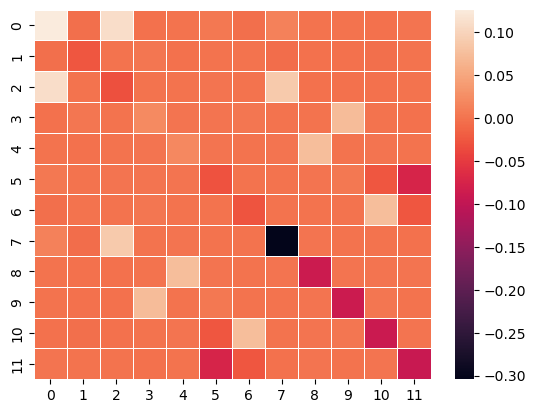

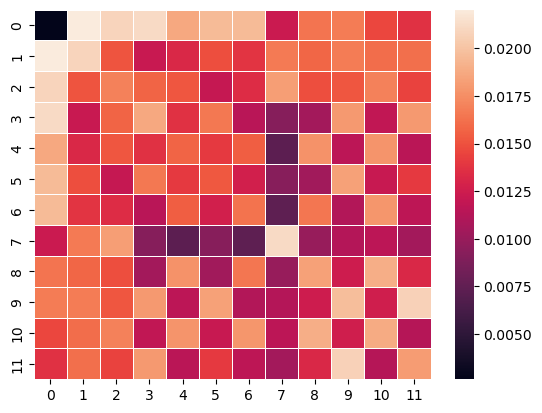

[1.12626889 0.97408498 0.96874089 1.0219665  1.01913024 0.97029322
 0.97189823 0.69579995 0.9122715  0.91205608 0.90945143 0.90839768]


In [8]:
import h5py
abvmc_file ='abvmc-test-ovlp-he.hdf5'
f = h5py.File(abvmc_file)
matrices = f['excitationsdelta'][...]
ovlp = f['excitationsovlp'][...]
import numpy as np
ovlp_avg = np.mean(ovlp[10:], axis=0)
ovlp_std = np.std(ovlp[10:], axis=0)
import seaborn as sns
ax = sns.heatmap(ovlp_avg-np.eye(12), linewidth=0.5)
plt.show()
ax = sns.heatmap(ovlp_std, linewidth=0.5)
plt.show()
print(np.diag(ovlp_avg))

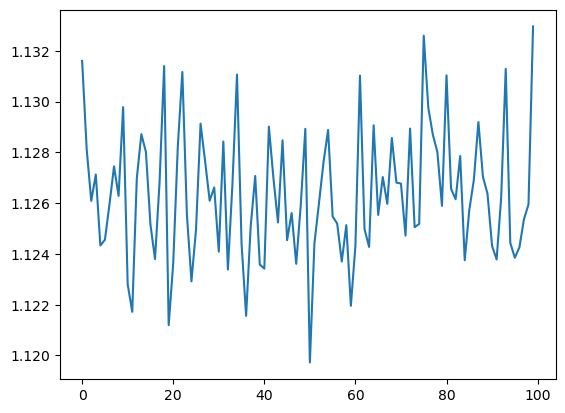

In [9]:
plt.plot(ovlp[...,0,0])
plt.show()


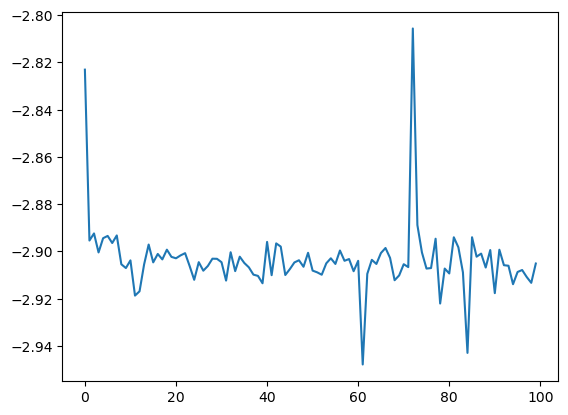

In [10]:
energy = f['energytotal'][...]
plt.plot(energy)
plt.show()